### task02 : Classification problem using MNIST dataset.

In [1]:
# load MNIST Handwritten dataset.
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [2]:
# mnist downoaded is a dictionary including specific keys and their corresp. values like this:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape # data_X, labels_y

((70000, 784), (70000,))

In [4]:
# we aim to visualize an image
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
sample_img = X[0]
sample_img_ = sample_img.reshape(28, 28) # reshape our numpy array to become as an image of 2D.

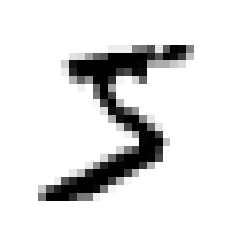

'5'

In [5]:
plt.imshow(sample_img_, cmap = mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()
y[0]

In [6]:
# we noticed that our labels are strings, so we prefer to cast as numbers. to get better results.
y = y.astype('uint8')
y[0] # Done!

5

In [7]:
# our MNIST_Handwritten dataset is already splitted and shuffeled for us into the fisrt 60000trainIMG, last 10000testIMG.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[: 60000], y[60000: ]

In [24]:
# let's start with a binary classifier to distinguish between the class of digit5 or not.
# for simplicity for now, let's train a binary classifier to just recognize single class assume the first digit 5 if it's 5 or not.
y_train_5 = (y_train==5)
# y_train_5.shape
y_test_5 = (y_test==5)

(60000,)

In [10]:
# le't pick up the stochastic gradient descent SGD to start with brecause it has an ability to handle multipe classes effieciently.
from sklearn.linear_model import SGDClassifier

model_SGD = SGDClassifier(random_state=42) # to create reproducible results. --> we used the random_state variable.
model_SGD.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
model_SGD.predict([X[0]])

array([ True])

### We aim to compute the performance measure of our SGD Binary Classifier we measure the `accuracy`.

In [12]:
from sklearn.model_selection import cross_val_score

SGD_score = cross_val_score(model_SGD, X_train, y_train_5, cv=3, scoring='accuracy') # because we have a classification problem.

In [13]:
SGD_score.mean()

0.9570333333333334

In [14]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### assume to have a dump classifier that always pridect it's `NOT-5` : Always False.

In [15]:
from sklearn.base import BaseEstimator

class never5Class(BaseEstimator):
      def fit(self, X, y=None): # it doesn't fit on any data at all.
          pass
      def predict(self, X): # predict method, doesn't get the labels as a parameter only the data
          return np.zeros((len(X), 1), dtype=bool)  

In [16]:
not5Class = never5Class()

In [17]:
score_never5Class = cross_val_score(not5Class, X_train, y_train_5, cv=3, scoring='accuracy')
score_never5Class.mean()

0.90965

As we can see in the above cell, that even if our model only predicts that every instance in our data
is not class-5 i.e. it always generates the prediction as `False` we got an accuracy of above `90%` !

This is because the % of examples that include actually the class-5 inn our training dataset is only 10%.

### For this reason, `accuracy` is always **not** a preferred performance measure with classification problems
### because we may have skewed data in which some classes are not equally represented in the data examples
For this reason, if our model always predicts that our data examples are not-5, it generates an accuracy of 90%, because class-5 represents only 10% of the data.

In [25]:
## to build the confusion matrix, we need to have a model predictions against the true labels. so we use cross_val_predict.
from sklearn.model_selection import cross_val_predict

SGD_classifier_predictions = cross_val_predict(model_SGD, X_train, y_train_5, cv=3) # here there's no a scoring criteria.

In [26]:
## it's the time to compute our confusion maatrix.
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_train_5, SGD_classifier_predictions)
conf_mat

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [28]:
# we aim to compute the classifier precision, recall
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, SGD_classifier_predictions), recall_score(y_train_5, SGD_classifier_predictions), f1_score(y_train_5, SGD_classifier_predictions)

(0.8370879772350012, 0.6511713705958311, 0.7325171197343846)

In [27]:
# let's pretend to have the perfect predictions. so: pretend=true_labels
pretend_predictions = y_train_5
conf_mat_ = confusion_matrix(pretend_predictions, y_train_5)
conf_mat_ # so we have zeros on the right diagonal and non-zeros on the left main diagonal of the confusion matrix.

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [30]:
# we aim to tune the threshold to control the precision/recall in our classifier
from sklearn.metrics import precision_recall_curve

SGD_scores = cross_val_predict(model_SGD, X_train, y_train_5, cv=3, method='decision_function')
# based on these classifier scores, we can compute the pre/recall curve for all possible thresholds
precisions, recalls, thresholds = precision_recall_curve(y_train_5, SGD_scores)

In [302]:
def precision_recall_curve_plot(precisions, recalls, thresholds):
    # plot() is used for continous values
    plt.plot(thresholds, precisions[:-1], 'r--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'b-', label='recall')
    plt.xlabel('Threshold')
    plt.legend()
    plt.grid()
    plt.title('Precision - Recall Curve vs Threshold')
    plt.figure(figsize=(25, 10))
    plt.show()

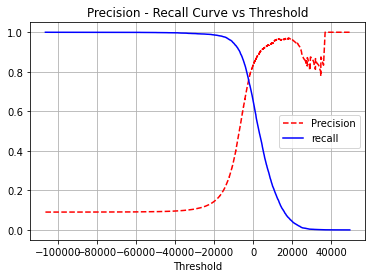

<Figure size 1800x720 with 0 Axes>

In [303]:
precision_recall_curve_plot(precisions, recalls, thresholds)

In [150]:
def precision_recall_direct_plot(recalls, precisions):
    plt.plot(recalls[:-1], precisions[:-1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid()
    plt.legend(['Recall-Precision'])
    plt.title('Precisin - Recall Curve Directly')
    plt.show()

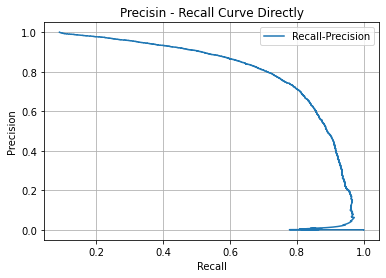

In [151]:
precision_recall_direct_plot(precisions, recalls)

### assume we want a classifier precision of >=90%
So? what is the corresponding suitable `threshold` to follow?

In [152]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.9)] # we get the index of the first threshold value using the argmax() method that represents the  90% precision.

In [153]:
threshold_90_precision

3370.0194991439594

In [158]:
# now it's the time to make predictions based on our new extracted threshold value.
SGD_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [159]:
y_pred = (SGD_scores>=threshold_90_precision)

In [163]:
precision_score(y_train_5, y_pred), recall_score(y_train_5, y_pred), f1_score(y_train_5, y_pred)

(0.9000345901072293, 0.4799852425751706, 0.626082771896054)

### It's a great achievement ;) to reach our target with a 90% precision classifier,  48% recall.

In [173]:
# let's consider to extract the threshold that corresponds to the .99 precision.

threshold_99_precision = thresholds[np.argmax(precisions>=0.99)]
y_pred_99 = (SGD_scores>=threshold_99_precision)
precision_score(y_train_5, y_pred_99), recall_score(y_train_5, y_pred_99), f1_score(y_train_5, y_pred_99)

(1.0, 0.0009223390518354548, 0.0018429782528566166)

In [174]:
threshold_99_precision

36801.60697028175

In [311]:
# now we plot the ROC:Reciever Operating Characteristic Curve for the TPR = sensitivity = Recall, FPR = 1-specificity where specificity = TNR
from sklearn.metrics import roc_curve

# we still need the classifier decision function scores not predictions to be able to plot the ROC curve.
# roc_curve () method computes the TPR, FPR for various thresholds to be plotted.
FPR, TPR, thresholds_ = roc_curve(y_train_5, SGD_scores)

In [245]:
def roc_curve_plot(FPR, TPR):
    plt.plot(FPR, TPR, 'r-', label='FPR : TPR')
    plt.plot([0, 1], [0, 1], 'b--', label='diagonal') # plotting the diagonal of the ROC curve.
#     plt.plot([0, 0.4], [0.4, 0.98], 'b--', label='checked:)') # plotting the diagonal of the ROC curve.
    plt.legend()
    plt.grid()
    plt.xlabel('False Postive Rate')
    plt.ylabel('True Postive Rate')
    plt.title('ROC curve of TPRate, FPRate')
    plt.show()

### ROC curve was another way to evaluate and compare classifiers.

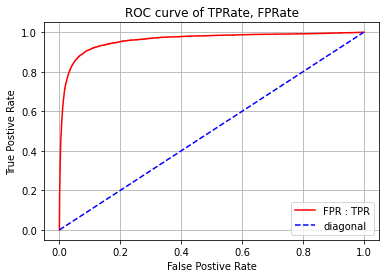

In [255]:
roc_curve_plot(FPR, TPR)

In [266]:
# to compare classifiers with each others we need to compute the AUC Area Under the Curve: random simple classifier has
# AUC = 0.5 = the area under the diagonal and the perfect classifier has AUC=1
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, SGD_scores)

0.9604938554008616

### After training our `SGDClassifier` and evaluating it's results, 
### what if we tried to traing a more advanced cllassifier, consider here the RFClassifier.
Random Forest Classifier Ensemble Classifier.

In [270]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(random_state=42)

In [271]:
model_RFC.fit(X_train, y_train_5)

RandomForestClassifier(random_state=42)

In [291]:
# now we compute it's confusion matrix using it's predictions generated.
from sklearn.model_selection import cross_val_predict

RFC_pred = cross_val_predict(model_RFC, X_train, y_train_5, cv=3, method='predict_proba', verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished


In [296]:
# confusion matrix
from sklearn.metrics import confusion_matrix
RFC_pred_ = np.zeros((RFC_pred.shape[0], ))
for i in range(RFC_pred.shape[0]):
    if RFC_pred[i][0] > RFC_pred[i][1]:  # in case that the -ve class has a greater sccore.
       RFC_pred_[i] = False
    elif RFC_pred[i][0]<=RFC_pred[i][1]:    # in case that the -ve class <= +ve class 
        RFC_pred_[i] = True
RFC_pred_.astype(bool)

array([ True, False, False, ...,  True, False, False])

In [297]:
confusion_matrix(y_train_5, RFC_pred_)

array([[54530,    49],
       [  691,  4730]], dtype=int64)

In [298]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_5, RFC_pred_), recall_score(y_train_5, RFC_pred_), f1_score(y_train_5, RFC_pred_)

(0.9897468089558485, 0.8725327430363402, 0.9274509803921569)

In [300]:
# to plot the Precision/Recall curve and the ROC, we need the scores which is not available in the RFClassifier.
# so instead we will consider the probability of the prediction of the positive class as the score.
# this s considered as a simple solution for this problem
from sklearn.metrics import precision_recall_curve

RFC_scores = RFC_pred[:, 1] # to extract only the prob of the positive class only.
precisions_RFC, recalls_RFC, thresholds_RFC = precision_recall_curve(y_train_5, RFC_scores)

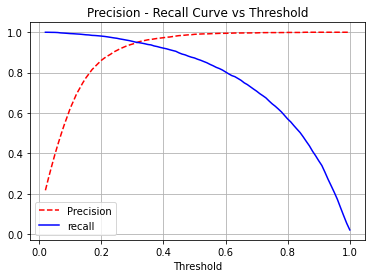

<Figure size 1800x720 with 0 Axes>

In [304]:
### it's the time to plot the precision/recall Versus the threshold curve
precision_recall_curve_plot(precisions_RFC, recalls_RFC, thresholds_RFC)

#### Our new classifier RFclassifier has now,  a better precision and recall than the pevious SGDClassifier.

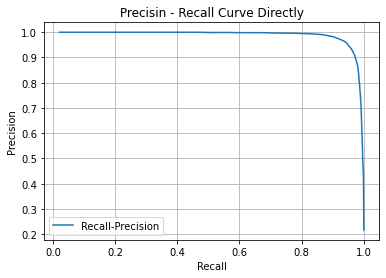

In [305]:
# plot the Precision/Recall directly.
precision_recall_direct_plot(recalls_RFC, precisions_RFC)

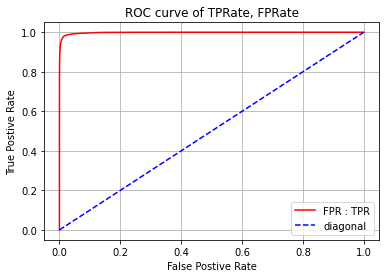

In [310]:
# plot the ROC to investigate the classifier performance with respect to the recall and the false positive rates
from sklearn.metrics import roc_curve

FPR_, TPR_, thresholds_RFC_ = roc_curve(y_train_5, RFC_scores)
roc_curve_plot(FPR, TPR)

####  Now we have a perfect binary classifier based on the RandomForestClassifier with precision ~100%

In [309]:
# ROC AUC:Area Under The Curve. ~ 100%
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, RFC_scores)

0.9983436731328145

In [316]:
def plot_SGD_RFC_ROC_curve(FPR, FPR_, TPR, TPR_):
    plt.plot(FPR, TPR, 'b-', label='SGD ROC')
    plt.plot(FPR_, TPR_, 'r--', label='RFC ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='simple random classifier')
    plt.legend()
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Postive Rate')
    plt.title('Compare ROC for both the SGD | RFC:')
    plt.show()

###  It's obvious that the AUC(Area under the curve) of RFClassifier is greater than that of the SGD Classifier.

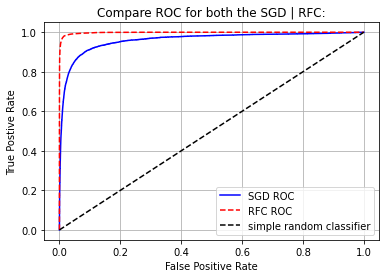

In [317]:
# Plotting the ROC for both the SGD, RFClassifier ROC for comparison.
plot_SGD_RFC_ROC_curve(FPR, FPR_, TPR, TPR_)

### Multi-class task.

In [420]:
model_RFC.predict_proba([X_train[0]])

array([[0.02, 0.98]])

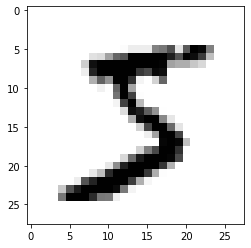

In [419]:
plt.imshow(np.reshape(X_train[0], (28, 28)), cmap=mpl.cm.binary,interpolation='nearest' )

In [417]:
model_SGD = SGDClassifier(random_state=42)
model_SGD.fit(X_train, y_train) # multi-class classification task so sklearn algorithm automatically implements an OvO strategy
                                # OvO: One-Versus-All strategy to implement the model so it creates multiple binary classifiers per each pair of classes.mo

SGDClassifier(random_state=42)

In [418]:
model_SGD.predict([X[0]]) # let's try some value to be predicted.

array([3], dtype=uint8)

Sklearn library automatically detects that you are implementing a multi-class classification task
through the training labels included so that it implements the OvA strategy for classification in which we train a binary classifier per each class and during the testing with a certain example(image) the library selects the class label of the highest score related with it's classifier.
On the other hand, SVMClassifier is having a poor performance with large data so sklearn implements a OvO strategy instead in this case so that we create a classifier per each pair of classes and during the testing we select the class that won all duals(المبارزات) within all classifiers.

`One-Versus-One strategy`: OvO: classifier per each pair of classes: implemented with SVMClassifiers
`One-Versus-All strategy`: OvA: classifier per each class: implemented with all other clssifiers

In [367]:
# it's the time now to evaluate our classifier performance using the confusion matrix.
SGD_muli_pred = cross_val_predict(model_SGD, X_train, y_train, cv=3) # SGD has the ability to get the predictions directly

In [369]:
SGD_muli_pred

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [370]:
confusion_matrix(y_train, SGD_multi_pred) # in case of the multi-class task we don't depend on the confusion matrix.

array([[5363,    0,   40,  131,    6,   98,   16,    7,  261,    1],
       [   1, 6482,   16,   74,    1,   10,    8,    8,  136,    6],
       [   5,   58, 4903,  292,   37,   30,   31,   48,  537,   17],
       [   3,    6,   65, 5637,    3,  120,    5,   19,  223,   50],
       [  14,   23,   32,   74, 4650,   50,   18,   40,  361,  580],
       [  17,    4,   31,  422,   32, 4318,   72,   31,  429,   65],
       [  15,    4,   61,   44,   25,   91, 5390,    3,  281,    4],
       [   3,    9,   49,  100,   22,   19,    2, 5671,  122,  268],
       [  13,   39,   28,  223,    6,  214,   13,   12, 5249,   54],
       [  10,    7,   20,  209,   46,   50,    0,  162,  262, 5183]],
      dtype=int64)

In [377]:
# by default, sklearn implements OvA strategy for all classifiers except the SVM classifier.
# so if you want to force a certain classifier of OvA -> to be using OvO , do the following:
from sklearn.multiclass import OneVsOneClassifier

model_SGD = SGDClassifier(random_state=42)
model_SGD_OvO = OneVsOneClassifier(model_SGD) # we created a SGDClassifier() that implements the logic of the OneVersusOne strategy.

In [ ]:
model_SGD_OvO.fit(X_train, y_train)

In [381]:
len(model_SGD_OvO.estimators_) # we need N*(N-1)/2 estimators to implement the OvO startegy i.e. N=no_classes, 10(9)/2 = 45.

45

In [388]:
model_SGD.predict([X_train[0]])

array([3], dtype=uint8)

In [389]:
from sklearn.preprocessing import StandardScaler # scaling the input training dataset may improve the classifier performance

scale_estim = StandardScaler()

In [390]:
X_train_scaled = scale_estim.fit_transform(X_train)

In [394]:
model_SGD.fit(X_train_scaled, y_train)
model_SGD.predict([X_test[0]])

array([7], dtype=uint8)

In [393]:
y_test[0]

7

In [395]:
predicti_ = model_SGD.predict(X_train_scaled)
confusion_matrix(y_train, predicti_)

array([[5584,    0,   11,    6,    6,   24,   27,    3,  262,    0],
       [   0, 6419,   39,   14,    3,   41,    4,    4,  214,    4],
       [  17,   21, 5287,   67,   59,   19,   48,   34,  402,    4],
       [  20,   13,   95, 5238,    0,  150,   21,   36,  505,   53],
       [   9,   12,   29,    8, 5245,    6,   26,   13,  384,  110],
       [  21,   15,   21,  127,   45, 4469,   66,   11,  594,   52],
       [  25,   15,   37,    2,   31,   73, 5566,    6,  163,    0],
       [  18,    9,   43,   13,   37,   12,    4, 5724,  250,  155],
       [  12,   52,   33,   83,    2,  101,   24,    4, 5509,   31],
       [  19,   18,   25,   51,  102,   25,    1,  147,  517, 5044]],
      dtype=int64)

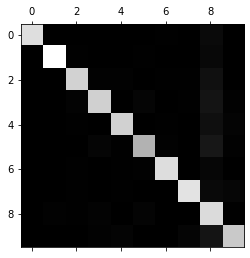

In [396]:
plt.matshow(confusion_matrix(y_train, predicti_), cmap = plt.cm.gray) # to show the confusion matrix clearly.

In [397]:
# to evaluate the SGDClassifier multi-class, we will depend on the accuracy as a performance measure
from sklearn.model_selection import cross_val_score

SGD_accuracy_3_cv = cross_val_score(model_SGD, X_train_scaled, y_train, cv=3, scoring='accuracy')

In [400]:
SGD_accuracy_3_cv

array([0.8983, 0.891 , 0.9018])

### Error Analysis using the confusion matrix

after plotting the matshow() of the confusion matrix, we realized that class-5 has a slightly darker light than other classes which means that some images in this class are mis-classified as 5 or the no. of 5s in the dataset is lower than other classes.

In [401]:
# let's get the confusion matrix normalized for error analysis investigation.
conf_mat = confusion_matrix(y_train, predicti_)

In [404]:
conf_col_sum = conf_mat.sum(axis=1, keepdims=True)

In [414]:
conf_norm = conf_mat/conf_col_sum
np.fill_diagonal(conf_norm, 0) # fill the normalized confusion matrix main diagonal with zeros to be able to detect errors easily.

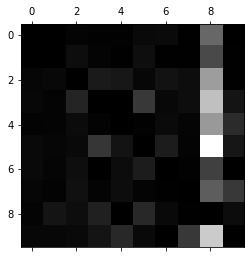

In [415]:
plt.matshow(conf_norm, cmap=mpl.cm.gray)
plt.show()

In [416]:
## we can see that there is any error between classes 3, 5 in addition that many classes were classified as class-8 especially with class-5

### Multi-label classification task

In [421]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier() # consider that the number of neighbours for classification is defaulted.

In [428]:
# create the multi-label for the classification task
y_7_to_9 = (y_train>=7)    # extract values from 7-9 only otherwise to be false.
y_odd = (y_train % 2 == 1) # extract the odd values only.
y_multi_labels = np.c_[y_7_to_9, y_odd]

In [430]:
y_multi_labels # so we could build the labels for 2 classes: for the values from 7-9 & the other for the odd values only.

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

### in this case of the multi-label classification, the classifier will learn to classifiy 2 separated classes independently.

It can be considered as multi-level of binary cassification task.

In [431]:
model_KNN.fit(X_train, y_multi_labels)

KNeighborsClassifier()

In [432]:
# consider the evaluation of a single instance classification.
model_KNN.predict([X_train[0]])

array([[False,  True]])

### compute the classifier predictions
### `instance-based classifier` so it has no decision function

In [433]:
KNN_pred = cross_val_predict(model_KNN, X_train, y_multi_labels, cv=2)

In [ ]:
KNN_pred

### task02: Exercises

In [10]:
# trying to build a classifier of accuracy > 97% on MNIST test dataset using the KNNClassifier.
from sklearn.naive_bayes import GaussianNB
model_NBC = GaussianNB()

In [11]:
model_NBC.fit(X_train, y_train)

GaussianNB()

In [18]:
# evaluate the classifier on the training dataset
NBC_pred = model_NBC.predict([X_train[59998]])

In [19]:
NBC_pred

array([6], dtype=uint8)

In [21]:
from sklearn.model_selection import cross_val_score
NBC_accu = cross_val_score(model_NBC, X_train, y_train, cv=3, scoring='accuracy')
NBC_accu

array([0.5592, 0.5603, 0.5572])

In [22]:
pred = model_NBC.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, pred)

In [24]:
score

0.5558

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()

In [26]:
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
pred_KNN = model_KNN.predict(X_test)

In [28]:
accuracy_score(y_test, pred_KNN)

0.9688

In [29]:
from scipy.ndimage.interpolation import shift # to shift our images

In [31]:
def shift_image(image, dx, dy):
    reshaped_img = np.reshape(image, (28, 28)) # to generate a 2d version of the input image.
    reshaped_img = shift(reshaped_img, shift=[dx, dy])
    return reshaped_img.reshape([-1])

In [32]:
# to improve the accuracy through the data augmentation.
# i.e. to increase the training dataset especially the MNIST handwritten by creating new versions of the images that are shifted by fo example one pixel in all possible directions.
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)): # to determine the direction of shifting by one pixel in all directions.
    for image, label in zip(X_train, y_train):
        shifted_image = shift_image(image, dx, dy)
        X_train_augmented.append(shifted_image)
        y_train_augmented.append(label)

In [ ]:
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [38]:
X_train_augmented.shape

(300000, 784)

In [39]:
x_ = [X_train]

In [42]:
x_ = [i for i in X_train]